In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

In [52]:
import torch
torch.__version__

'1.11.0+cu102'

In [53]:
import torch.nn as nn

In [54]:
np.random.seed(123)
torch.manual_seed(123)

In [55]:
previsores = pd.read_csv('entradas_breast.csv')
classe = pd.read_csv('saidas_breast.csv')

In [56]:
previsores.shape

(569, 30)

In [57]:
previsores.head

<bound method NDFrame.head of       radius_mean   texture_mean   perimeter_mean   area_mean  \
0           17.99          10.38           122.80      1001.0   
1           20.57          17.77           132.90      1326.0   
2           19.69          21.25           130.00      1203.0   
3           11.42          20.38            77.58       386.1   
4           20.29          14.34           135.10      1297.0   
..            ...            ...              ...         ...   
564         21.56          22.39           142.00      1479.0   
565         20.13          28.25           131.20      1261.0   
566         16.60          28.08           108.30       858.1   
567         20.60          29.33           140.10      1265.0   
568          7.76          24.54            47.92       181.0   

      smoothness_mean   compactness_mean   concavity_mean  \
0             0.11840            0.27760          0.30010   
1             0.08474            0.07864          0.08690   
2     

In [58]:
classe.head

<bound method NDFrame.head of      0
0    0
1    0
2    0
3    0
4    0
..  ..
564  0
565  0
566  0
567  0
568  1

[569 rows x 1 columns]>

In [59]:
np.unique(classe)

array([0, 1])

/home/otallyto/senior/classificacao-binaria/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='count'>

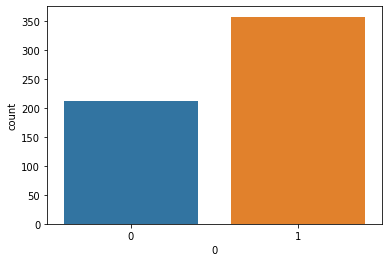

In [60]:
sns.countplot(classe['0'])

In [61]:
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores,
                                                                                              classe,
                                                                                              test_size = 0.25)

In [62]:
previsores_treinamento.shape

(426, 30)

In [63]:
classe_treinamento.shape

(426, 1)

In [64]:
previsores_teste.shape

(143, 30)

In [65]:
classe_teste.shape

(143, 1)

In [66]:
type(previsores_treinamento)

pandas.core.frame.DataFrame

In [67]:
type(np.array(previsores_treinamento))

numpy.ndarray

In [68]:
previsores_treinamento = torch.tensor(np.array(previsores_treinamento), dtype=torch.float)
classe_treinamento = torch.tensor(np.array(classe_treinamento), dtype = torch.float)

In [69]:
type(previsores_treinamento)

torch.Tensor

In [70]:
type(classe_treinamento)

torch.Tensor

In [71]:
dataset = torch.utils.data.TensorDataset(previsores_treinamento, classe_treinamento)

In [72]:
type(dataset)

torch.utils.data.dataset.TensorDataset

In [73]:
train_loader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True)

Etapa 4: Construção do modelo

In [74]:
# camada de entrada 30 neuronios -> camada oculta 16 neuronios -> camada oculta 16 neuronios -> camada de saida 1 neuronio
# (entrada + saida) / 2 = (30 + 1) / 2 = 16
classificador = nn.Sequential(
    nn.Linear(in_features=30, out_features=16),
    nn.ReLU(),
    nn.Linear(16, 16),
    nn.ReLU(),
    nn.Linear(16, 1),
    nn.Sigmoid()
)

In [75]:
classificador.parameters

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)>

In [76]:
criterion = nn.BCELoss()

In [77]:
optimizer = torch.optim.Adam(classificador.parameters(), lr=0.001, weight_decay=0.0001)

Etapa 5: Treinamento do modelo

In [78]:
for epoch in range(100):
  running_loss = 0.

  for data in train_loader:
    inputs, labels = data
    #print(inputs)
    #print('-----')
    #print(labels)
    optimizer.zero_grad()

    outputs = classificador(inputs) # classificador.forward(inputs)
    #print(outputs)
    loss = criterion(outputs, labels)
    #print(loss)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
  print('Época %3d: perda %.5f' % (epoch+1, running_loss/len(train_loader)))

Época   1: perda 10.78336
Época   2: perda 2.84863
Época   3: perda 1.67480
Época   4: perda 1.11414
Época   5: perda 0.63996
Época   6: perda 0.63753
Época   7: perda 0.58066
Época   8: perda 0.55460
Época   9: perda 0.55617
Época  10: perda 0.53322
Época  11: perda 0.55797
Época  12: perda 0.53816
Época  13: perda 0.52938
Época  14: perda 0.33227
Época  15: perda 0.51360
Época  16: perda 0.35532
Época  17: perda 0.49602
Época  18: perda 0.33208
Época  19: perda 0.29349
Época  20: perda 0.25046
Época  21: perda 0.29527
Época  22: perda 0.49888
Época  23: perda 0.47241
Época  24: perda 0.45883
Época  25: perda 0.27544
Época  26: perda 0.23399
Época  27: perda 0.26373
Época  28: perda 0.24136
Época  29: perda 0.28275
Época  30: perda 0.22633
Época  31: perda 0.19294
Época  32: perda 0.22258
Época  33: perda 0.20290
Época  34: perda 0.20888
Época  35: perda 0.20335
Época  36: perda 0.20316
Época  37: perda 0.18855
Época  38: perda 0.22316
Época  39: perda 0.23315
Época  40: perda 0.19261

Etapa 6: Visualização dos pesos

In [79]:
params = list(classificador.parameters())

In [80]:
params

[Parameter containing:
 tensor([[-7.0383e-02, -1.1207e-01, -1.8798e-01,  4.7441e-02, -1.5485e-01,
           9.5234e-02, -1.3539e-01, -1.2362e-01, -2.2592e-01,  1.7398e-01,
          -2.5586e-02,  6.2692e-02, -1.2015e-01, -1.0582e-01,  2.0913e-03,
          -2.3384e-01, -3.8969e-01, -3.4844e-02,  9.7729e-02,  5.4830e-03,
           1.3914e-01, -8.6065e-02, -5.0620e-02,  1.3179e-01,  4.8892e-01,
           1.4548e-01, -1.8037e-01,  5.7787e-02,  2.9666e-01,  4.4511e-02],
         [ 1.9552e-01,  2.0509e-01,  2.8965e-01,  1.0102e-01, -1.3337e-01,
          -8.4264e-02, -7.1298e-02, -1.3671e-01, -2.9883e-02,  2.9008e-01,
          -6.3485e-02, -9.0179e-02, -7.8924e-03,  1.6774e-01, -4.7917e-03,
          -8.9527e-02, -1.1098e-02,  2.1501e-01,  7.8884e-02, -1.5008e-02,
           9.8590e-02,  5.6942e-02,  1.9170e-01,  8.7883e-03, -1.6901e-02,
          -2.4835e-01, -1.8176e-01, -1.6588e-02, -6.7060e-02, -1.6873e-01],
         [-1.2614e-02, -6.0502e-02, -2.5585e-01, -1.1376e-01, -2.0406e-02,


In [81]:
# 30 -> 16 -> 16 -> 1
pesos0 = params[0]
pesos0.shape

torch.Size([16, 30])

In [82]:
bias0 = params[1]
bias0.shape

torch.Size([16])

In [83]:
pesos1 = params[2]
pesos1.shape

torch.Size([16, 16])

In [84]:
bias1 = params[3]
bias1.shape

torch.Size([16])

Etapa 7: Avaliação do modelo

In [85]:
classificador.eval()

Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)

In [86]:
type(previsores_teste)

pandas.core.frame.DataFrame

In [87]:
previsores_teste = torch.tensor(np.array(previsores_teste), dtype=torch.float)

In [88]:
type(previsores_teste)

torch.Tensor

In [89]:
previsoes = classificador.forward(previsores_teste)

In [90]:
previsores_teste

tensor([[1.1250e+01, 1.4780e+01, 7.1380e+01,  ..., 1.6670e-02, 2.8150e-01,
         7.4180e-02],
        [9.7420e+03, 1.5670e+01, 6.1500e+01,  ..., 5.1590e-02, 2.8410e-01,
         8.1750e-02],
        [1.7540e+01, 1.9320e+01, 1.1510e+02,  ..., 1.9390e-01, 2.9280e-01,
         7.8670e-02],
        ...,
        [2.0550e+01, 2.0860e+01, 1.3780e+02,  ..., 2.1480e-01, 3.0770e-01,
         7.5690e-02],
        [1.2870e+01, 1.9540e+01, 8.2670e+01,  ..., 6.3840e-02, 3.3130e-01,
         7.7350e-02],
        [2.3210e+01, 2.6970e+01, 1.5350e+02,  ..., 2.5930e-01, 3.1030e-01,
         8.6770e-02]])

In [91]:
previsoes = np.array(previsoes > 0.5)

In [92]:
previsoes

array([[ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [

In [93]:
taxa_acerto = accuracy_score(classe_teste, previsoes)

In [94]:
taxa_acerto

0.8951048951048951

In [95]:
matriz = confusion_matrix(classe_teste, previsoes)
matriz

array([[42, 12],
       [ 3, 86]])

In [96]:
sns.heatmap(matriz, annot=True)

NameError: name 'snb' is not defined